In [4]:
!pip3 install pynimate

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import time
from matplotlib.animation import FuncAnimation
import plotly.graph_objects as go

import pynimate as nim

In [6]:
games = pd.read_csv('games.csv')
#plays = pd.read_csv('plays.csv')
player_play = pd.read_csv('player_play.csv')
players = pd.read_csv('players.csv')
tracking_data = pd.read_csv('tracking_week_1.csv')

In [7]:
tracking_data.shape

(7104700, 18)

In [8]:
game_plays = pd.merge(games[games['week'] == 1], player_play, on='gameId', how='left')

In [9]:
game_player_plays = pd.merge(game_plays, players[['nflId', 'position']], on=['nflId'], how='left')

In [10]:
game_player_plays.shape

(42944, 59)

In [11]:
games_player_plays_tracking = pd.merge(tracking_data, game_player_plays, on=['gameId', 'playId', 'nflId'], how='left')

In [12]:
games_player_plays_tracking.shape

(7104700, 74)

In [13]:
games_player_plays_tracking = games_player_plays_tracking.sort_values(by=['gameId', 'playId', 'frameId'])

In [14]:
games_player_plays_tracking

,gameId,playId,nflId,displayName,frameId,frameType,time,jerseyNumber,club,playDirection,...,routeRan,blockedPlayerNFLId1,blockedPlayerNFLId2,blockedPlayerNFLId3,pressureAllowedAsBlocker,timeToPressureAllowedAsBlocker,pff_defensiveCoverageAssignment,pff_primaryDefensiveCoverageMatchupNflId,pff_secondaryDefensiveCoverageMatchupNflId,position
6686928,2022090800,56,35472.0,Rodger Saffold,1,BEFORE_SNAP,2022-09-09 00:23:48.2,76.0,BUF,left,...,NaN,47917.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,G
6687120,2022090800,56,38577.0,Bobby Wagner,1,BEFORE_SNAP,2022-09-09 00:23:48.2,45.0,LA,left,...,NaN,NaN,NaN,NaN,NaN,NaN,HCR,47879.0,NaN,ILB
6687312,2022090800,56,41239.0,Aaron Donald,1,BEFORE_SNAP,2022-09-09 00:23:48.2,99.0,LA,left,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DT
6687504,2022090800,56,42392.0,Mitch Morse,1,BEFORE_SNAP,2022-09-09 00:23:48.2,60.0,BUF,left,...,NaN,47917.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,C
6687696,2022090800,56,42489.0,Stefon Diggs,1,BEFORE_SNAP,2022-09-09 00:23:48.2,14.0,BUF,left,...,IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435712,2022091200,4012,53438.0,Patrick Surtain,63,AFTER_SNAP,2022-09-13 03:09:23.9,2.0,DEN,right,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CB
435775,2022091200,4012,53534.0,Baron Browning,63,AFTER_SNAP,2022-09-13 03:09:23.9,56.0,DEN,right,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ILB
435838,2022091200,4012,54474.0,Charles Cross,63,AFTER_SNAP,2022-09-13 03:09:23.9,67.0,SEA,right,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T
435901,2022091200,4012,54537.0,Abraham Lucas,63,AFTER_SNAP,2022-09-13 03:09:23.9,72.0,SEA,right,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T


In [15]:
games_player_plays_tracking['game'] = games_player_plays_tracking['visitorTeamAbbr'] + '@' + games_player_plays_tracking['homeTeamAbbr']

In [16]:
games_player_plays_tracking['off/def'] = np.where(games_player_plays_tracking['displayName'] == 'football', 'football',
                                                  np.where(games_player_plays_tracking['position'].isin(['QB', 'RB', 'FB', 'WR', 'TE', 'C', 'T', 'G']), 'offense', 'defense')  )
games_player_plays_tracking['off/def'].unique()

array(['offense', 'defense', 'football'], dtype=object)

       game      gameId
0    BUF@LA  2022090800
1    NO@ATL  2022091100
2   CLE@CAR  2022091101
3    SF@CHI  2022091102
4   PIT@CIN  2022091103
5   PHI@DET  2022091104
6   IND@HOU  2022091105
7    NE@MIA  2022091106
8   BAL@NYJ  2022091107
9   NYG@TEN  2022091108
10  JAX@WAS  2022091109
11   KC@ARI  2022091110
12   LV@LAC  2022091111
13   GB@MIN  2022091112
14   TB@DAL  2022091113
15  DEN@SEA  2022091200
Enter gameId: 2022090800
[  56   80  101  122  167  191  212  236  299  343  364  393  414  438
  467  486  529  550  569  593  617  646  692  721  775  818  867  896
  933  954 1009 1030 1102 1126 1187 1208 1230 1254 1286 1315 1334 1358
 1385 1406 1427 1483 1504 1563 1609 1635 1657 1712 1736 1757 1800 1836
 1946 1967 1991 2043 2072 2093 2137 2163 2184 2208 2288 2307 2336 2360
 2381 2400 2464 2485 2506 2527 2551 2572 2599 2623 2688 2712 2733 2755
 2815 2839 2860 2884 2908 2934 2958 2979 3047 3092 3121 3145 3166 3190
 3214 3262 3283 3304 3341 3362 3407 3431 3455 3489 3513 3537 3576 3617

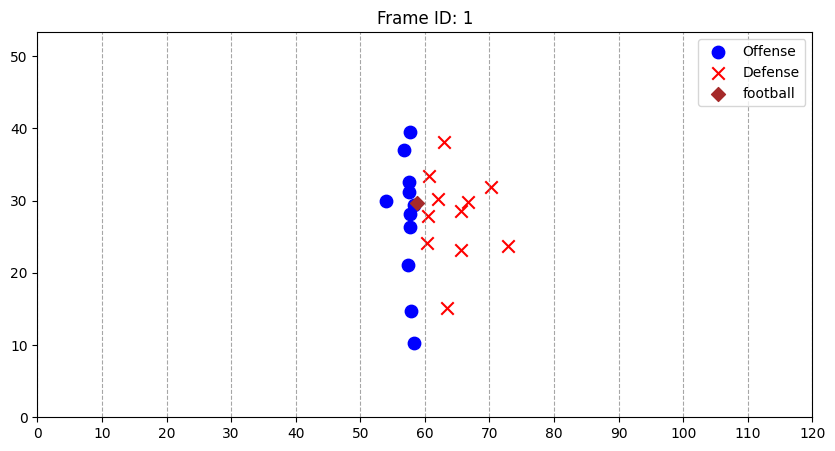

In [29]:
# Filter to SNAP and AFTER_SNAP frames
print(games_player_plays_tracking[['game', 'gameId']].drop_duplicates().dropna().reset_index(drop=True))
gameId = int(input('Enter gameId: '))
print(games_player_plays_tracking[games_player_plays_tracking['gameId'] == gameId]['playId'].unique())
playId = int(input('Enter playId: '))
play_tracking_frame = games_player_plays_tracking[(games_player_plays_tracking['gameId'] == gameId) &
                                                  (games_player_plays_tracking['playId'] == playId)]

# Group by frame
grouped = list(play_tracking_frame.groupby('frameId'))

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim(0, 120)
ax.set_ylim(0, 53.3)
ax.set_xticks(range(0, 121, 10))
ax.grid(True, axis='x', linestyle='--', color='gray', alpha=0.7)

# Initialize two scatter plots: offense and defense
offense_scatter = ax.scatter([], [], color='blue', marker='o', label='Offense', s=80)
defense_scatter = ax.scatter([], [], color='red', marker='x', label='Defense', s=80)
football_scatter = ax.scatter([], [], color='brown', marker='D', label='football', s=50)

ax.legend(loc='upper right')

# Update function
def update(i):
    frame_data = grouped[i][1]
    offense_data = frame_data[frame_data['off/def'] == 'offense']
    defense_data = frame_data[frame_data['off/def'] == 'defense']
    football_data = frame_data[frame_data['off/def'] == 'football']

    offense_scatter.set_offsets(offense_data[['x', 'y']].values)
    defense_scatter.set_offsets(defense_data[['x', 'y']].values)
    football_scatter.set_offsets(football_data[['x', 'y']].values)

    ax.set_title(f"Frame ID: {grouped[i][0]}")
    return offense_scatter, defense_scatter, football_scatter

# Run the animation
ani = FuncAnimation(fig, update, frames=len(grouped), interval=100, blit=False)

In [30]:
from IPython.display import HTML, display
display(HTML(ani.to_html5_video()))

In [32]:
ani.save("play.gif", writer='pillow', fps=10)